# Deterministic Random Walks

## Node Based

In [1]:
import networkx as nx
import matplotlib.pyplot as plt


In [85]:
def deterministic_random_walk(G, w0, t, r):
    """
    Simulates a deterministic random walk on a graph.

    Parameters:
        G (networkx.Graph): The input graph on which the random walk is performed.
        w0 (dict): A dictionary mapping each node to a list representing the initial number of walkers at that node.
        t (int): The number of time steps for the random walk simulation.
        r (float): The proportion of walkers that move to neighboring nodes at each time step.

    Returns:
        dict: A dictionary mapping each node to a list of the number of walkers at each time step.
    """
    wt = w0 # initial conditions
    degree_dict = dict(nx.degree(G))

    for t in range(t-1):
        for i, n_walkers_list in wt.items():
            n_walkers = n_walkers_list[-1] # get W_i(t)
            neighbours = list(G.neighbors(i)) 
            total_in = 0
            for j in neighbours:
                total_in += r*wt[j][t]/degree_dict[j] # get sum of r*W_j(t)/k_j (incoming walkers from all neighbours)
            n_walkers_new = n_walkers - r*n_walkers + total_in
            wt[i].append(n_walkers_new)
    return wt


In [143]:
er_network = nx.erdos_renyi_graph(100, 0.05)
W = 1000
wt0 = {i: [0] if i != 0 else [1000] for i in er_network.nodes()} # all walkers start on node 0
wi = deterministic_random_walk(er_network, wt0, 100, 0.5)
wi

{0: [1000,
  500.0,
  306.7261904761905,
  211.33928571428572,
  155.6416075098194,
  119.52717061340906,
  94.52582932989674,
  76.44882387964273,
  62.967617348965646,
  52.6772541891559,
  44.679036321568866,
  38.37233619829631,
  33.34153062423691,
  29.290620750981383,
  26.003595019239338,
  23.319483021858268,
  21.11615753542729,
  19.29952612986135,
  17.796139531286244,
  16.54802135161609,
  15.50897565979978,
  14.641899126194167,
  13.916790056893102,
  13.309250261916528,
  12.799341820161576,
  12.370703766044858,
  12.009862131103954,
  11.705685881877692,
  11.448954364638752,
  11.232010954214124,
  11.048484023621743,
  10.893060957118145,
  10.761304283127014,
  10.649501480133537,
  10.55454186150822,
  10.473815348286838,
  10.405129013156216,
  10.346638109589293,
  10.29678894821532,
  10.254271492262706,
  10.217979947661597,
  10.186979945183122,
  10.16048116987211,
  10.137814500695146,
  10.118412891268074,
  10.101795358857299,
  10.08755355988718,
  10.0

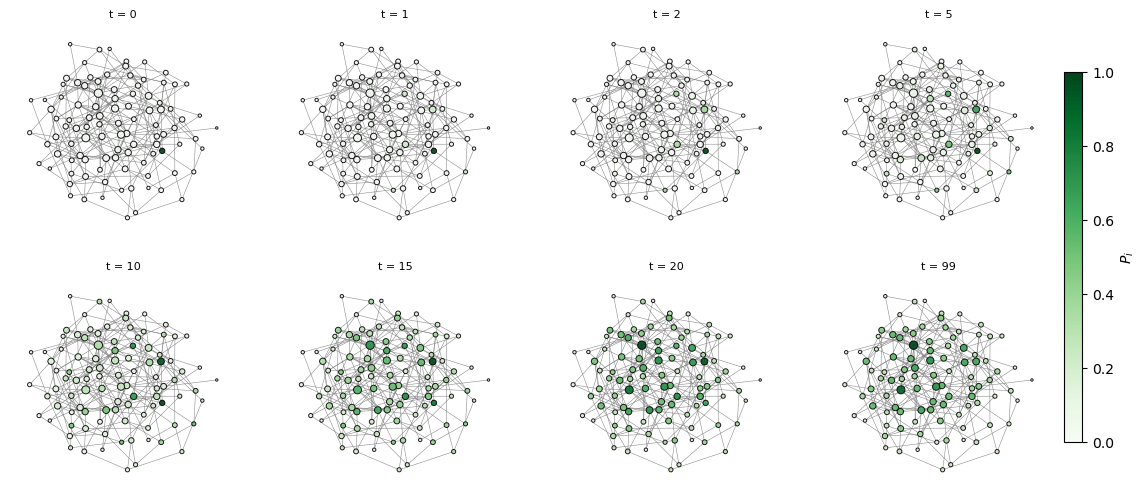

In [210]:
import matplotlib.pyplot as plt
import matplotlib as mpl

pos = nx.kamada_kawai_layout(er_network)
fig, ax = plt.subplots(2, 4, figsize=(16, 6))
ax = ax.flatten()  # Flatten the 2D array of axes to make it iterable

# Create a colormap and normalize for the colorbar
cmap = plt.cm.Greens
norm = mpl.colors.Normalize(vmin=0, vmax=1)  # Adjust vmin and vmax as needed

for e, i in enumerate((0, 1, 2, 5, 10, 15, 20, 99)):
    stationary_distribution = [w[i] / W for w in wi.values()]
    nx.draw(er_network, pos=pos, node_size=[k * 3 for k in dict(er_network.degree()).values()], width=0.4,
            node_color=stationary_distribution, cmap=cmap, alpha=0.9, edge_color='grey',edgecolors="black", 
            linewidths = 0.7, ax=ax[e])
    ax[e].set_title(f"t = {i}", fontsize = 8)




# Add a single colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for compatibility with colorbar
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", shrink=0.8, pad=0.01)
cbar.set_label("$P_i$")

plt.show()


In [220]:
ba_network = nx.barabasi_albert_graph(100, 3)
W = 1000
wt0 = {i: [0] if i != 0 else [1000] for i in ba_network.nodes()} # all walkers start on node 0
wi_ba = deterministic_random_walk(ba_network, wt0, 100, 0.5)


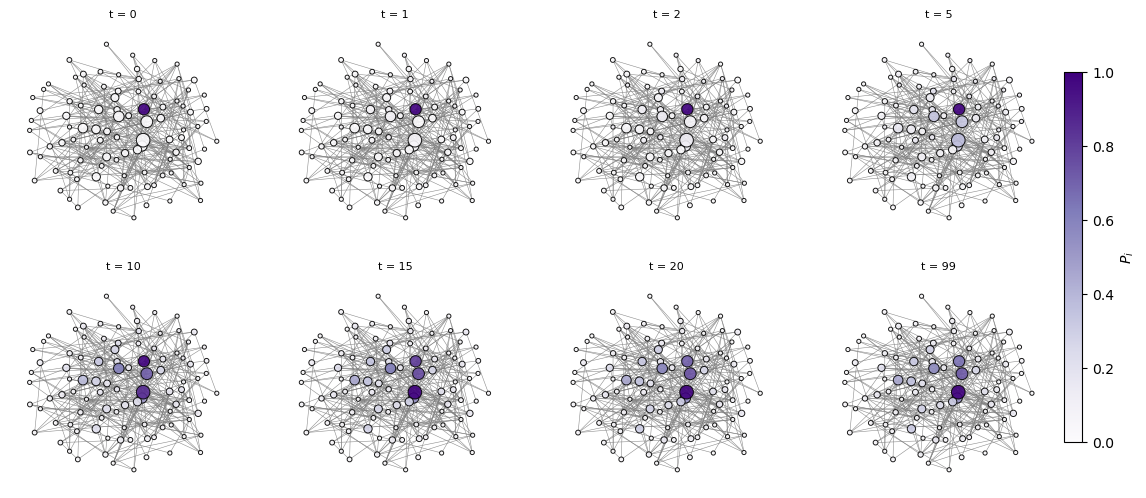

In [221]:
import matplotlib.pyplot as plt
import matplotlib as mpl

pos = nx.kamada_kawai_layout(ba_network)
fig, ax = plt.subplots(2, 4, figsize=(16, 6))
ax = ax.flatten()  # Flatten the 2D array of axes to make it iterable

# Create a colormap and normalize for the colorbar
cmap = plt.cm.Purples
norm = mpl.colors.Normalize(vmin=0, vmax=1)  # Adjust vmin and vmax as needed

for e, i in enumerate((0, 1, 2, 5, 10, 15, 20, 99)):
    stationary_distribution = [w[i] / W for w in wi_ba.values()]
    nx.draw(er_network, pos=pos, node_size=[k * 3 for k in dict(ba_network.degree()).values()], width=0.4,
            node_color=stationary_distribution, cmap=cmap, alpha=0.9, edge_color='grey',edgecolors="black", 
            linewidths = 0.7, ax=ax[e])
    ax[e].set_title(f"t = {i}", fontsize = 8)

# Add a single colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for compatibility with colorbar
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", shrink=0.8, pad=0.01)
cbar.set_label("$P_i$")

plt.show()


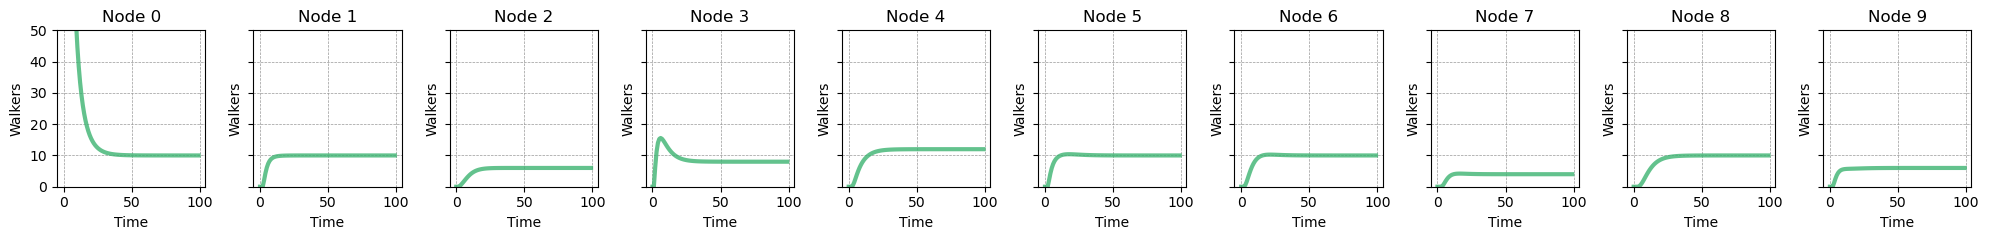

In [215]:
fig, axes = plt.subplots(1, 10, figsize=(20, 2.5), sharey=True)

for i, (node, walkers) in enumerate(wi.items()):
    if i >= 10:
        break
    axes[i].plot(walkers, linewidth=3, color = "mediumseagreen", alpha = 0.8)
    axes[i].set_title(f'Node {node}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Walkers')
    axes[i].grid(color = '#999999', linestyle = '--', linewidth = 0.5)
    axes[i].set_ylim(0, 50)

plt.tight_layout()
plt.show()

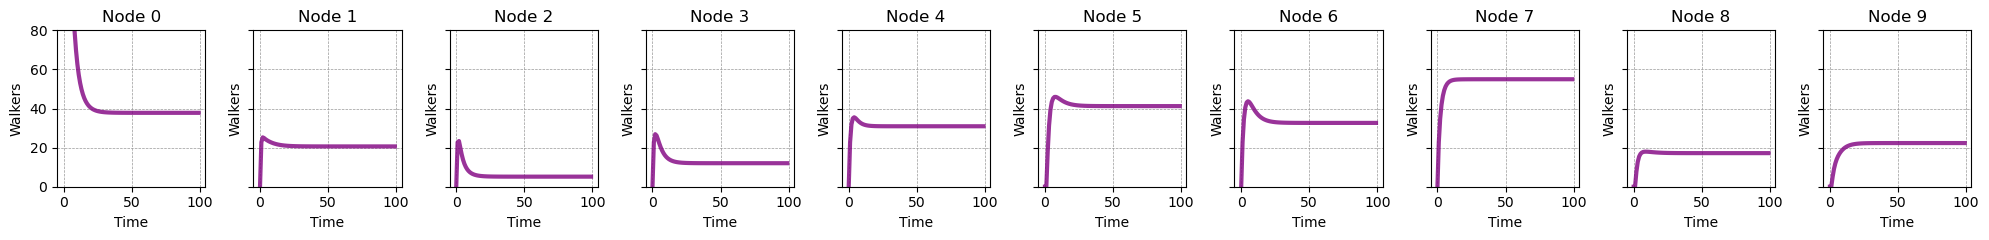

In [223]:
fig, axes = plt.subplots(1, 10, figsize=(20, 2.5), sharey=True)

for i, (node, walkers) in enumerate(wi_ba.items()):
    if i >= 10:
        break
    axes[i].plot(walkers, linewidth=3, color = "purple", alpha = 0.8)
    axes[i].set_title(f'Node {node}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Walkers')
    axes[i].grid(color = '#999999', linestyle = '--', linewidth = 0.5)
    axes[i].set_ylim(0, 80)

plt.tight_layout()
plt.show()

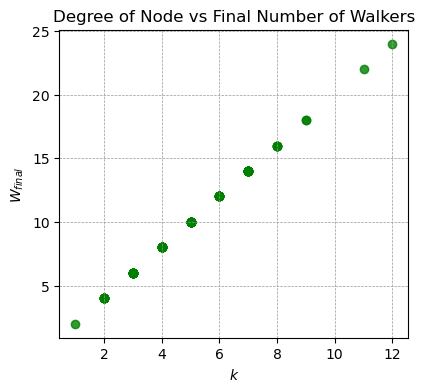

In [224]:
# Get the degree of each node
degrees = dict(er_network.degree())

# Get the final number of walkers for each node
final_walkers = {node: walkers[-1] for node, walkers in wi.items()}

# Create lists for degrees and final walkers
x = [degrees[node] for node in degrees]
y = [final_walkers[node] for node in final_walkers]

# Plot the scatterplot
plt.figure(figsize=(4.5, 4))
plt.scatter(x, y, color='green', alpha=0.8)
plt.xlabel('$k$')
plt.ylabel('$W_{final}$')
plt.title('Degree of Node vs Final Number of Walkers')
plt.grid(color = '#999999', linestyle = '--', linewidth = 0.5)
plt.show()

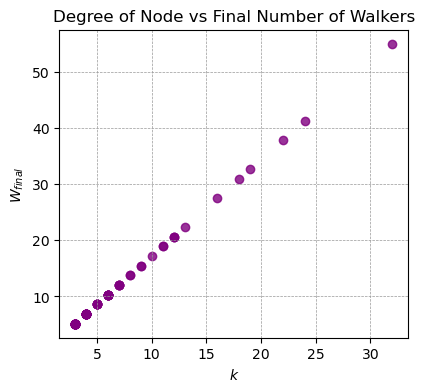

In [225]:
# Get the degree of each node
degrees = dict(ba_network.degree())

# Get the final number of walkers for each node
final_walkers = {node: walkers[-1] for node, walkers in wi_ba.items()}

# Create lists for degrees and final walkers
x = [degrees[node] for node in degrees]
y = [final_walkers[node] for node in final_walkers]

# Plot the scatterplot
plt.figure(figsize=(4.5, 4))
plt.scatter(x, y, color='purple', alpha=0.8)
plt.xlabel('$k$')
plt.ylabel('$W_{final}$')
plt.title('Degree of Node vs Final Number of Walkers')
plt.grid(color = '#999999', linestyle = '--', linewidth = 0.5)
plt.show()

## Degree Block Approximation

In [228]:
def degree_block_random_walk(G, w0, t, r):
    """
    Simulates a degree block approximation of a deterministic random walk on a graph.

    Parameters:
        G (networkx.Graph): The input graph on which the random walk is approximated.
        w0 (dict): A dictionary mapping each degree block (k) to a list representing the initial number of walkers in that block.
        t (int): The number of time steps for the random walk approximation.
        r (float): The proportion of walkers that move at each time step.
    
    Returns:
        dict: A dictionary mapping each degree block (k) to a list of the number of walkers at each time step.
    """
    wk = w0 # initial conqditions
    for i in range(t-1):
        for k, n_walkers_list in wk.items():
            n_walkers = n_walkers_list[-1] # get W_k(t)
            n_walkers_new = n_walkers - r*n_walkers + (k*r*W)/(k_bar*G.number_of_nodes()) # get W_k(t+1)
            wk[k].append(n_walkers_new)

    return wk
        

In [229]:
W = 1000
w0 = {i: [0] if i != 0 else [W] for i in er_network.nodes()}
degree_dict = dict(nx.degree(er_network))
k_bar = sum(dict(er_network.degree()).values())/len(er_network.degree()) # average degree
max_degree = max(degree_dict.values())
wk = {k: [0] for k in range(max_degree+1)}
for i in er_network.nodes():
    wk[degree_dict[i]][0] += w0[i][0] #/ sum(1 for d in degree_dict.values() if d == degree_dict[i])

r = 0.5
t= 100

wk = degree_block_random_walk(er_network, wk, t, r)

In [240]:
degrees

{0: 5,
 1: 5,
 2: 3,
 3: 4,
 4: 6,
 5: 5,
 6: 5,
 7: 2,
 8: 5,
 9: 3,
 10: 5,
 11: 6,
 12: 7,
 13: 6,
 14: 7,
 15: 8,
 16: 7,
 17: 6,
 18: 9,
 19: 4,
 20: 3,
 21: 4,
 22: 4,
 23: 2,
 24: 4,
 25: 3,
 26: 4,
 27: 8,
 28: 4,
 29: 3,
 30: 6,
 31: 7,
 32: 5,
 33: 7,
 34: 7,
 35: 5,
 36: 4,
 37: 6,
 38: 4,
 39: 6,
 40: 7,
 41: 5,
 42: 4,
 43: 7,
 44: 7,
 45: 5,
 46: 7,
 47: 3,
 48: 2,
 49: 3,
 50: 5,
 51: 7,
 52: 4,
 53: 4,
 54: 7,
 55: 2,
 56: 5,
 57: 5,
 58: 4,
 59: 7,
 60: 6,
 61: 5,
 62: 4,
 63: 8,
 64: 7,
 65: 1,
 66: 8,
 67: 4,
 68: 2,
 69: 9,
 70: 2,
 71: 4,
 72: 5,
 73: 4,
 74: 4,
 75: 2,
 76: 3,
 77: 11,
 78: 8,
 79: 12,
 80: 2,
 81: 3,
 82: 7,
 83: 2,
 84: 6,
 85: 7,
 86: 3,
 87: 4,
 88: 3,
 89: 3,
 90: 5,
 91: 3,
 92: 6,
 93: 7,
 94: 3,
 95: 4,
 96: 4,
 97: 6,
 98: 4,
 99: 5}

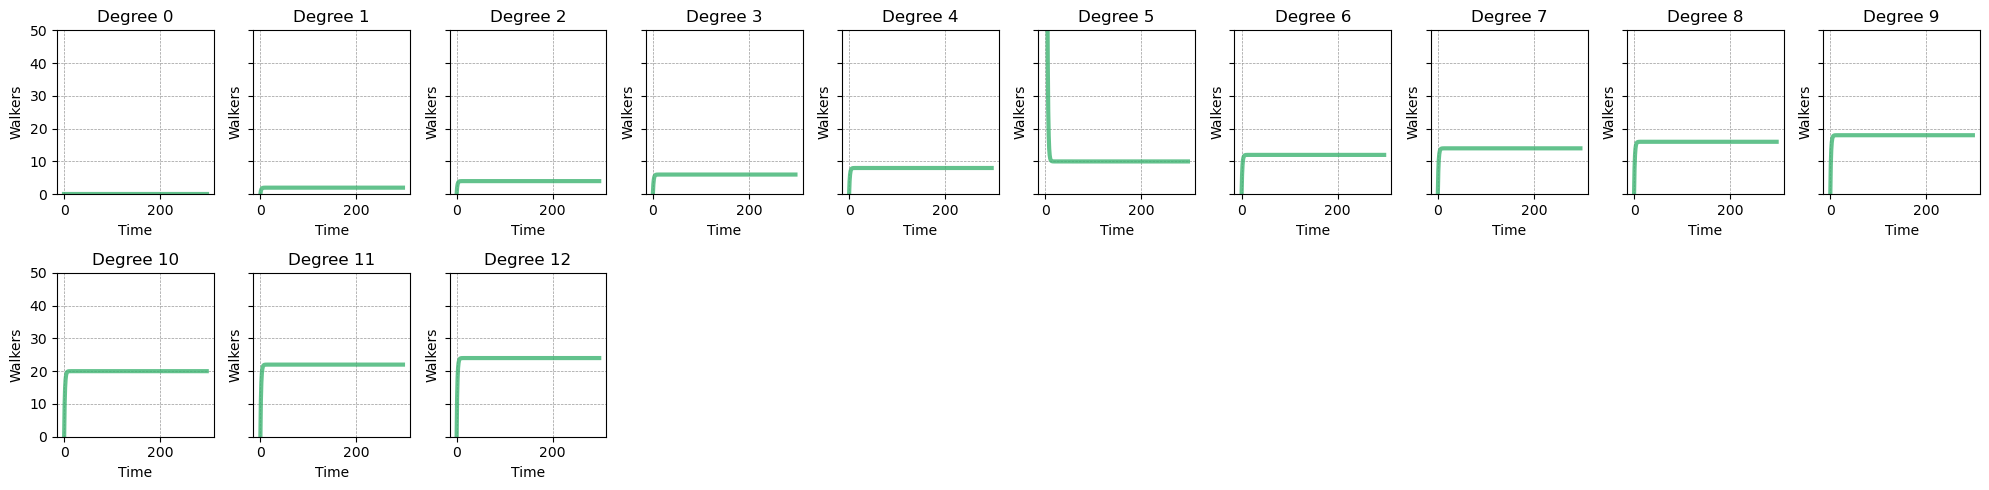

In [243]:
fig, axes = plt.subplots(2, 10, figsize=(20, 5), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()
degrees = dict(er_network.degree())
# Plot the number of walkers in each degree class
for i, (degree_class, walkers) in enumerate(wk.items()):
    if i >= max(degrees.values())+1:  # Only plot the first 13 panels
        break
    axes[i].plot(walkers, linewidth=3, color="mediumseagreen", alpha=0.8)
    axes[i].set_title(f'Degree {degree_class}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Walkers')
    axes[i].grid(color='#999999', linestyle='--', linewidth=0.5)
    axes[i].set_ylim(0, max(max(walkers), 50))

# Hide the remaining empty panels
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

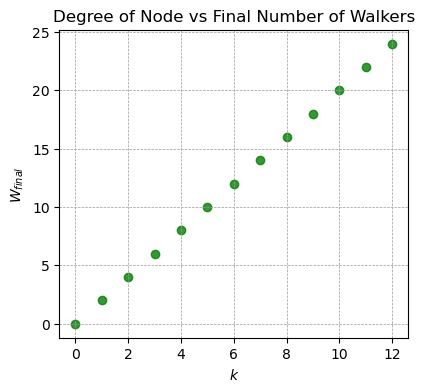

In [237]:
# Get the degree of each node
degrees = dict(er_network.degree())

# Get the final number of walkers for each node
final_walkers = {node: walkers[-1] for node, walkers in wk.items()}

# Create lists for degrees and final walkers
x = wk.keys()
y = [final_walkers[node] for node in final_walkers]

# Plot the scatterplot
plt.figure(figsize=(4.5, 4))
plt.scatter(x, y, color='green', alpha=0.8)
plt.xlabel('$k$')
plt.ylabel('$W_{final}$')
plt.title('Degree of Node vs Final Number of Walkers')
plt.grid(color = '#999999', linestyle = '--', linewidth = 0.5)
plt.show()